### Loading Data
Only about **Percent.adults.fully.vaccinated** so far.

In [ ]:
library(tidyverse)

In [42]:
dat <- read.csv("Vaccine_Hesitancy_for_COVID-19__County_and_local_estimates.csv")[,c(1:19)]
dat_f <- 
    dat %>%
    tibble() %>%
    drop_na()

### Histogram
Oh it looks like a normal distribution

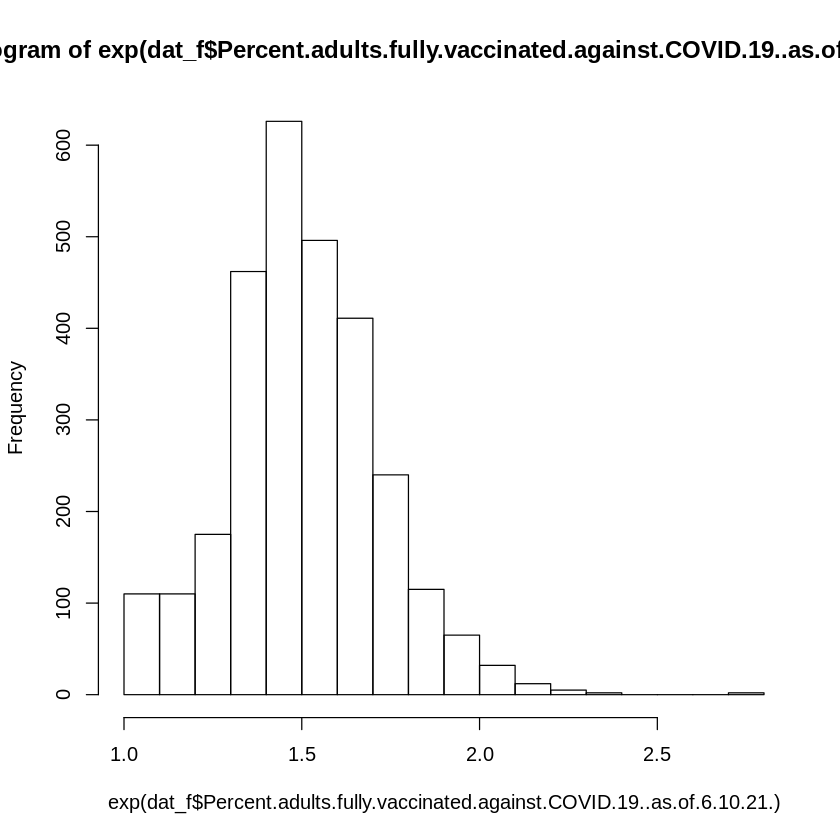

In [121]:
hist(exp(dat_f$Percent.adults.fully.vaccinated.against.COVID.19..as.of.6.10.21.))

### Q-Q plot
So let us test it!

Warning message:
“Use of `dat_f$Percent.adults.fully.vaccinated.against.COVID.19..as.of.6.10.21.` is discouraged. Use `Percent.adults.fully.vaccinated.against.COVID.19..as.of.6.10.21.` instead.”
Warning message:
“Use of `dat_f$Percent.adults.fully.vaccinated.against.COVID.19..as.of.6.10.21.` is discouraged. Use `Percent.adults.fully.vaccinated.against.COVID.19..as.of.6.10.21.` instead.”


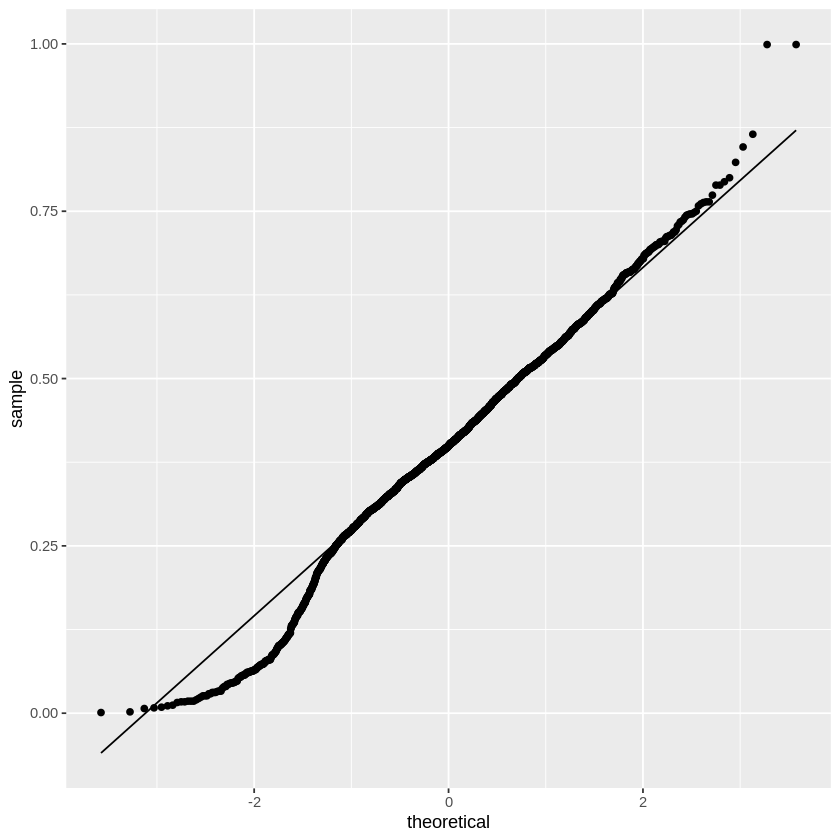

In [66]:
dat_f %>%
ggplot(aes(sample = dat_f$Percent.adults.fully.vaccinated.against.COVID.19..as.of.6.10.21.)) +
  geom_qq() + geom_qq_line()

### MLE
Draw a contour pplot of the log\-likelihood of joint mu and sigma

In [117]:
#用log-likelihood
mu <- round(seq(.2,.6,length=100),4)
sigma <- round(seq(.1,.3,length=100),4)
like <- matrix(rep(0,10000),ncol=100)
for (i in 1:100){
    for (j in 1:100){
        like[i,j]=-sum((dat_f$Percent.adults.fully.vaccinated.against.COVID.19..as.of.6.10.21.-mu[i])^2)/
                      (2*sigma[j]^2)-nrow(dat_f)*log(sigma[j])
    }
}
like <- like/max(like)

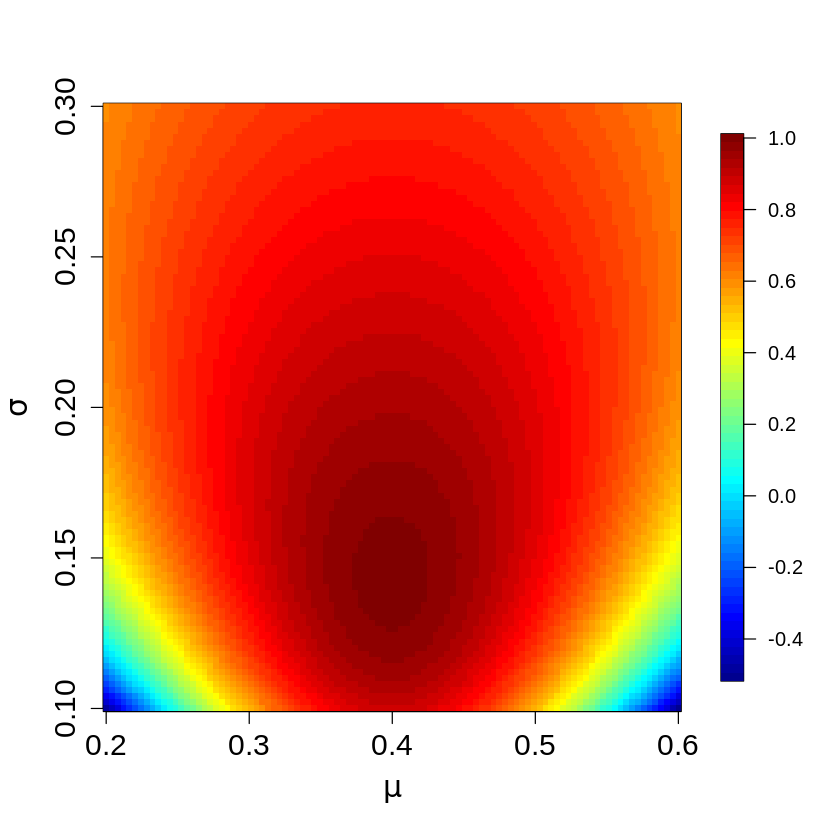

In [118]:
library(fields)
image.plot(mu,sigma,like,xlab=expression(mu),
ylab=expression(sigma),cex.lab=1.5,cex.axis=1.5)